In [22]:
import cmocean.cm as cm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from salishsea_tools import viz_tools

In [154]:
results_all = pd.read_csv('results_0_30.csv')
results_all = results_all.rename(columns={'Unnamed: 0': 'model'})
cols = results_all.columns.tolist()
cols.insert(0, cols.pop(cols.index('region')))
results_all = results_all.reindex(columns=cols)
results_201905R = results_all[results_all['model'] == '201905R']
results_202111 = results_all[results_all['model'] == '202111']
results_all

,region,model,number,bias,rmse,crmse,swillmott,slopedev,const,systematic,nonsystematic,spread
0,Nooksack,201905R,493,-0.372496,1.343144,1.290458,0.194442,0.107826,2.676550,0.413360,1.214554,0.145026
1,Skagit,201905R,1169,0.675844,3.129948,3.056110,0.188757,0.489161,13.393868,2.393344,1.706950,0.661527
2,Snohomish,201905R,7406,0.102359,0.894892,0.889018,0.076312,0.084176,2.568114,0.178411,0.842323,0.140259
3,Nisqually,201905R,37818,-0.607901,0.790937,0.506002,0.265152,0.325027,8.878144,0.661447,0.380143,0.458868
4,Elwha,201905R,4824,-0.074556,0.565490,0.560554,0.076882,0.159058,5.069409,0.194467,0.493724,0.265615
5,Cowichan,201905R,40032,-0.746949,1.104502,0.813628,0.248753,-0.608157,-18.666818,0.920144,0.906167,-1.199956
6,Nanaimo,201905R,7577,0.065916,0.461718,0.456988,0.037652,-0.207019,-6.172762,0.236913,0.444026,-9.800512
7,Puntledge,201905R,4618,0.048930,0.608670,0.606700,0.108102,0.211605,6.065334,0.228966,0.513594,0.323339
8,Salmon,201905R,2647,0.117805,0.233393,0.201481,0.075895,0.182547,5.793954,0.145317,0.168207,0.305869
9,Homathko,201905R,11082,0.370951,2.301974,2.271889,0.060322,0.181649,5.379140,1.019625,1.901486,0.299762


In [155]:
results_best = results_202111.drop(columns=['model','number'])
results_best

,region,bias,rmse,crmse,swillmott,slopedev,const,systematic,nonsystematic,spread
11,Nooksack,-0.024210,1.244678,1.244443,0.187125,0.221167,6.229858,0.368366,1.078861,0.289414
12,Skagit,-0.159610,3.883482,3.880201,0.167898,-0.203978,-5.462960,0.970607,4.205417,-0.302228
13,Snohomish,0.140506,0.767051,0.754073,0.043754,-0.158783,-4.510702,0.309388,0.764492,-0.316355
14,Nisqually,-0.615539,0.667226,0.257493,0.139508,-0.097283,-3.454793,0.620465,0.258209,-0.195857
15,Elwha,-0.087847,0.482381,0.474315,0.053229,0.122681,3.879684,0.164036,0.428331,0.223608
16,Cowichan,-0.718543,0.965377,0.644709,0.208636,-0.381530,-11.960639,0.793688,0.688257,-0.830674
17,Nanaimo,0.041328,0.381699,0.379455,0.028077,-0.103174,-3.067913,0.120706,0.382267,-8.666646
18,Puntledge,0.218828,0.629469,0.590209,0.116903,0.248253,7.277207,0.341683,0.475045,0.378758
19,Salmon,0.147432,0.274949,0.232079,0.107890,0.236280,7.494368,0.184023,0.184352,0.375555
20,Homathko,0.342381,2.136635,2.109024,0.050229,0.151853,4.529060,0.864639,1.822139,0.255632


In [157]:
def compare_stats(res_201905R, res_202111, metric):
    if np.abs(res_201905R[metric].values[0]) < np.abs(res_202111[metric].values[0]):
        return '201905R'
    elif np.abs(res_201905R[metric].values[0]) > np.abs(res_202111[metric].values[0]):
        return '202111'
    else:
        return 'same'

In [158]:
def compile_compare(res_201905R, res_202111, metric, regions):
    met_vec = []
    for region in regions:
        met_vec = met_vec + [compare_stats(res_201905R[res_201905R['region'] == region], res_202111[res_202111['region'] == region], metric)]
    return met_vec

In [166]:
regions = results_202111.region.to_list()
for metric in results_best.columns[1:]:
    results_best[metric] = compile_compare(results_201905R, results_202111, metric, regions)
results_best

,region,bias,rmse,crmse,swillmott,slopedev,const,systematic,nonsystematic,spread
11,Nooksack,202111,202111,202111,202111,201905R,201905R,202111,202111,201905R
12,Skagit,202111,201905R,201905R,202111,202111,202111,202111,201905R,202111
13,Snohomish,201905R,202111,202111,202111,201905R,201905R,201905R,202111,201905R
14,Nisqually,201905R,202111,202111,202111,202111,202111,202111,202111,202111
15,Elwha,201905R,202111,202111,202111,202111,202111,202111,202111,202111
16,Cowichan,202111,202111,202111,202111,202111,202111,202111,202111,202111
17,Nanaimo,202111,202111,202111,202111,202111,202111,202111,202111,202111
18,Puntledge,201905R,201905R,202111,201905R,201905R,201905R,201905R,202111,201905R
19,Salmon,201905R,201905R,201905R,201905R,201905R,201905R,201905R,201905R,201905R
20,Homathko,202111,202111,202111,202111,202111,202111,202111,202111,202111


Text(0.5, 1.0, 'Number of Obs Per Region')

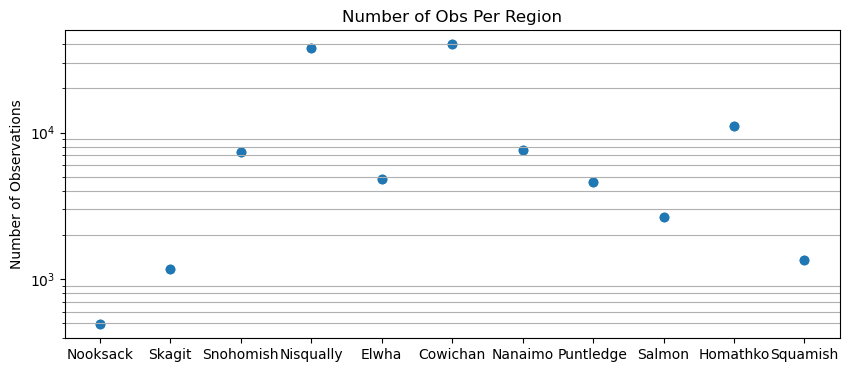

In [167]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

ax.grid(axis='y', which='minor')
ax.scatter(results_all['region'], results_all['number'])
ax.set_yscale('log')

ax.set_ylabel(r'Number of Observations')
ax.set_title('Number of Obs Per Region')

bias improved in 202111 for: Nooksack, Skagit, Cowichan, Nanaimo, Homathko, Squamish


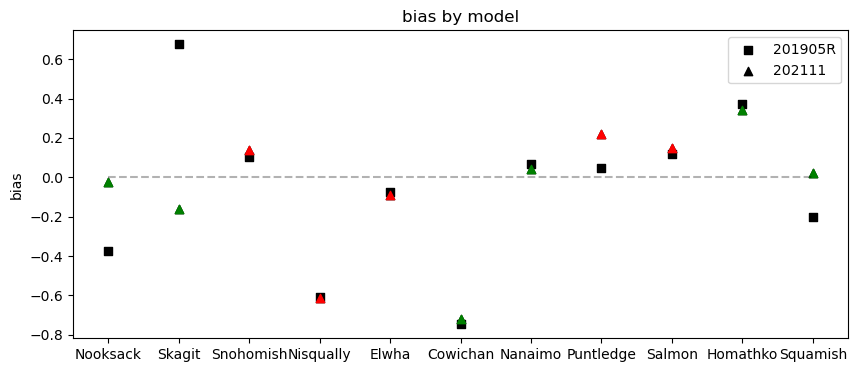

In [168]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'bias'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by model')
ax.legend()

impr = results_202111[results_best['bias'] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

rmse improved in 202111 for: Nooksack, Skagit, Cowichan, Nanaimo, Homathko, Squamish


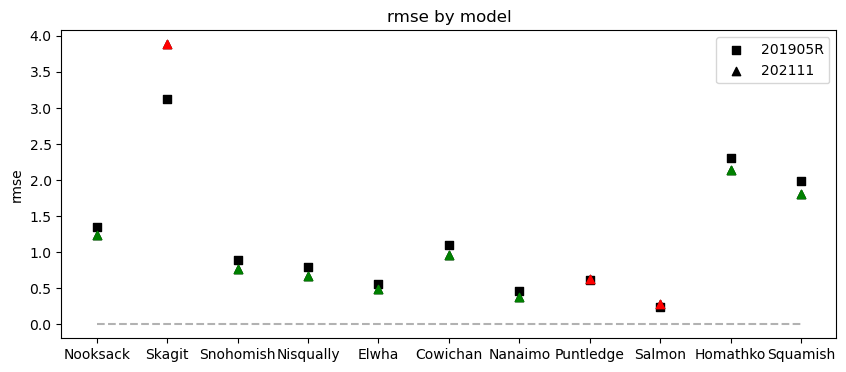

In [170]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'rmse'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by model')
ax.legend()

impr = results_202111[results_best['bias'] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

crmse improved in 202111 for: Nooksack, Skagit, Cowichan, Nanaimo, Homathko, Squamish


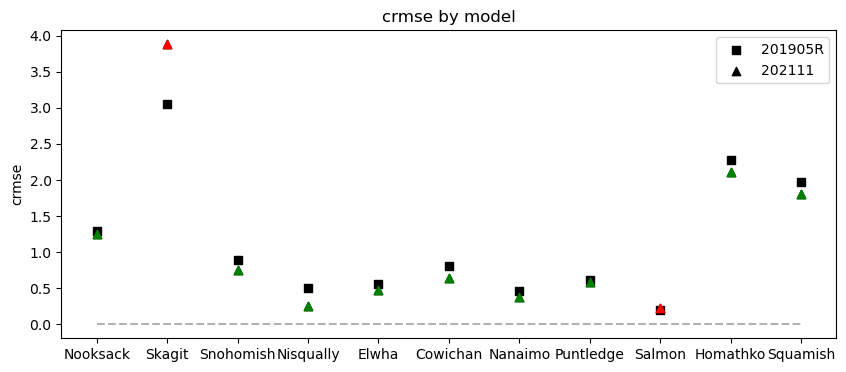

In [171]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'crmse'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by model')
ax.legend()

impr = results_202111[results_best['bias'] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

swillmott improved in 202111 for: Nooksack, Skagit, Cowichan, Nanaimo, Homathko, Squamish


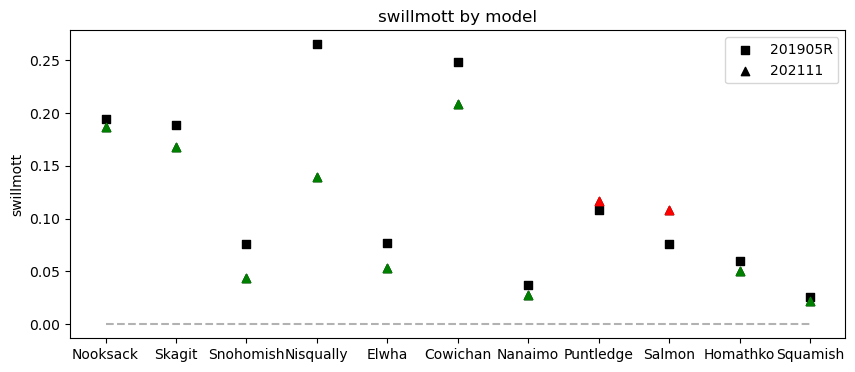

In [172]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'swillmott'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by model')
ax.legend()

impr = results_202111[results_best['bias'] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

slopedev improved in 202111 for: Nooksack, Skagit, Cowichan, Nanaimo, Homathko, Squamish


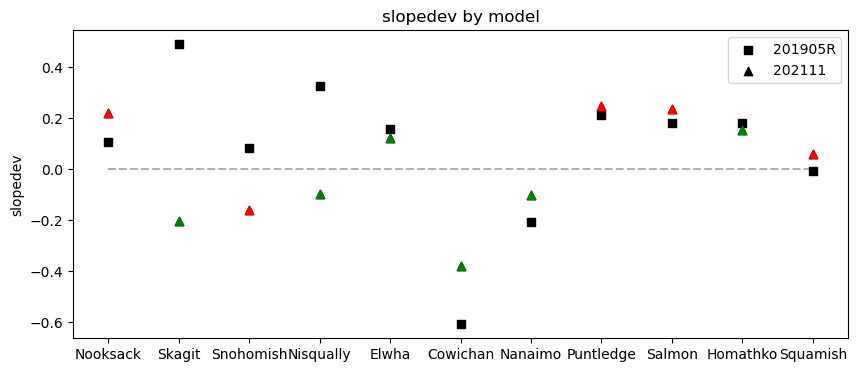

In [173]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'slopedev'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by model')
ax.legend()

impr = results_202111[results_best['bias'] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

const improved in 202111 for: Nooksack, Skagit, Cowichan, Nanaimo, Homathko, Squamish


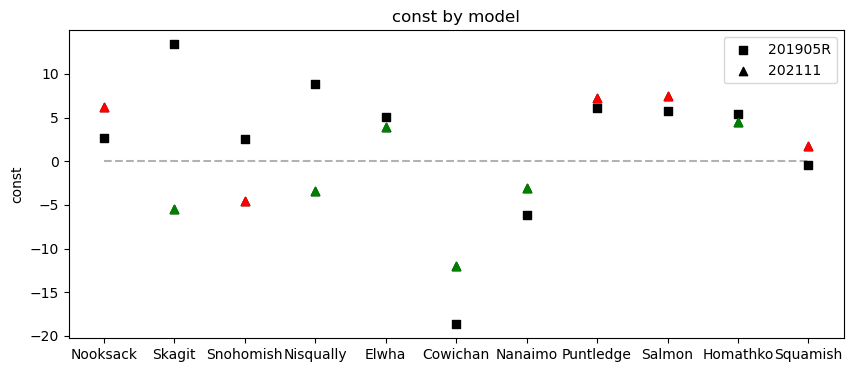

In [174]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'const'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by model')
ax.legend()

impr = results_202111[results_best['bias'] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

systematic improved in 202111 for: Nooksack, Skagit, Cowichan, Nanaimo, Homathko, Squamish


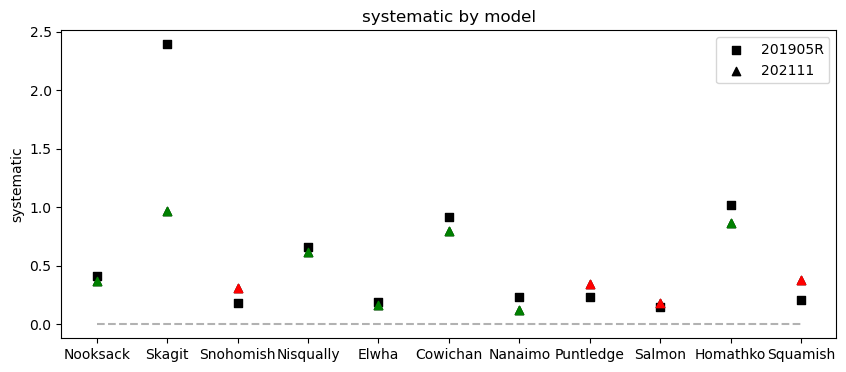

In [175]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'systematic'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by model')
ax.legend()

impr = results_202111[results_best['bias'] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

nonsystematic improved in 202111 for: Nooksack, Skagit, Cowichan, Nanaimo, Homathko, Squamish


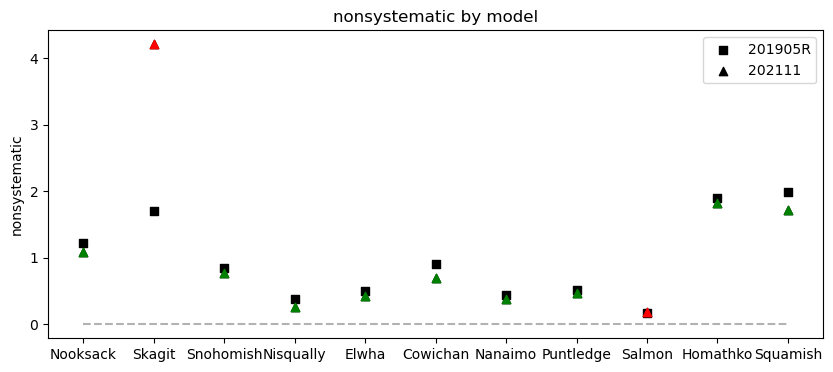

In [176]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'nonsystematic'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by model')
ax.legend()

impr = results_202111[results_best['bias'] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

spread improved in 202111 for: Nooksack, Skagit, Cowichan, Nanaimo, Homathko, Squamish


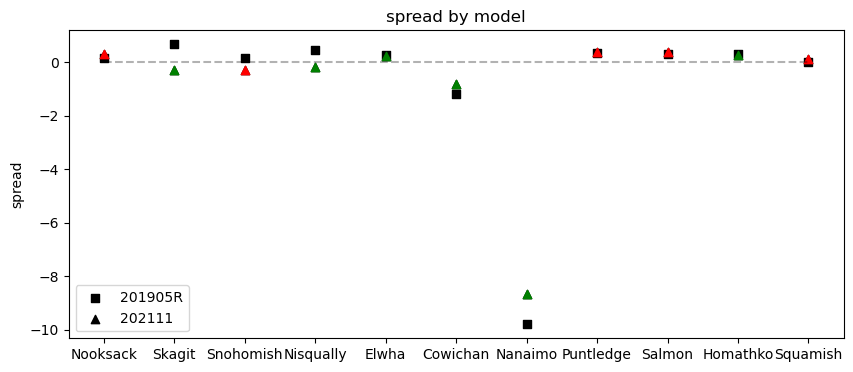

In [177]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'spread'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by model')
ax.legend()

impr = results_202111[results_best['bias'] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)